**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Check Hypothesis: The average duration of movies has declined over the years.

In [40]:
#Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")
print("The longest duration is " + str(netflix_df['duration'].max()),"minutes and the shortest duration is " + str(netflix_df['duration'].min()) + " minute.")

The longest duration is 312 minutes and the shortest duration is 1 minute.


In [111]:
## Let's create a sample df from the friend's data for the past decade
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [300, 240, 225, 200, 190, 180, 150, 120, 100, 90]
# Create a dictionary with the two lists
movie_dict = {"years": years, "durations": durations}
# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Let's check our sample data with a line graph.  We expect the duration to decline based on the dictionary key, value combinations.

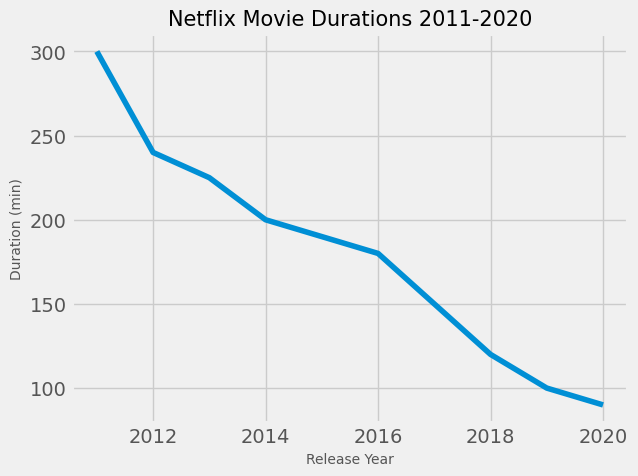

In [117]:
## MAKE A LINE PLOT OF RAW DATA DF
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df[["years"]], durations_df[["durations"]])
plt.xlabel("Release Year", fontsize=10)
plt.ylabel("Duration (min)", fontsize=10)

# Create a title
plt.title("Netflix Movie Durations 2011-2020", color="black", fontsize=15)
plt.savefig("netflix_movie_durations.png", dpi=300, bbox_inches="tight")
plt.show()

Our sample data behaved as expected.  Let's move on to our friend's hypothesis on the Netflix data.Our goal is to analyze the duration of movies and determine if it has increased or decreased over time.  I will subset the data for movies only and remove unnecessary columns and data for this analysis.

In [44]:
#filter data set for movies and pull only necessary columns
# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Select only the columns of interest
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

netflix_movies.head(1)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93


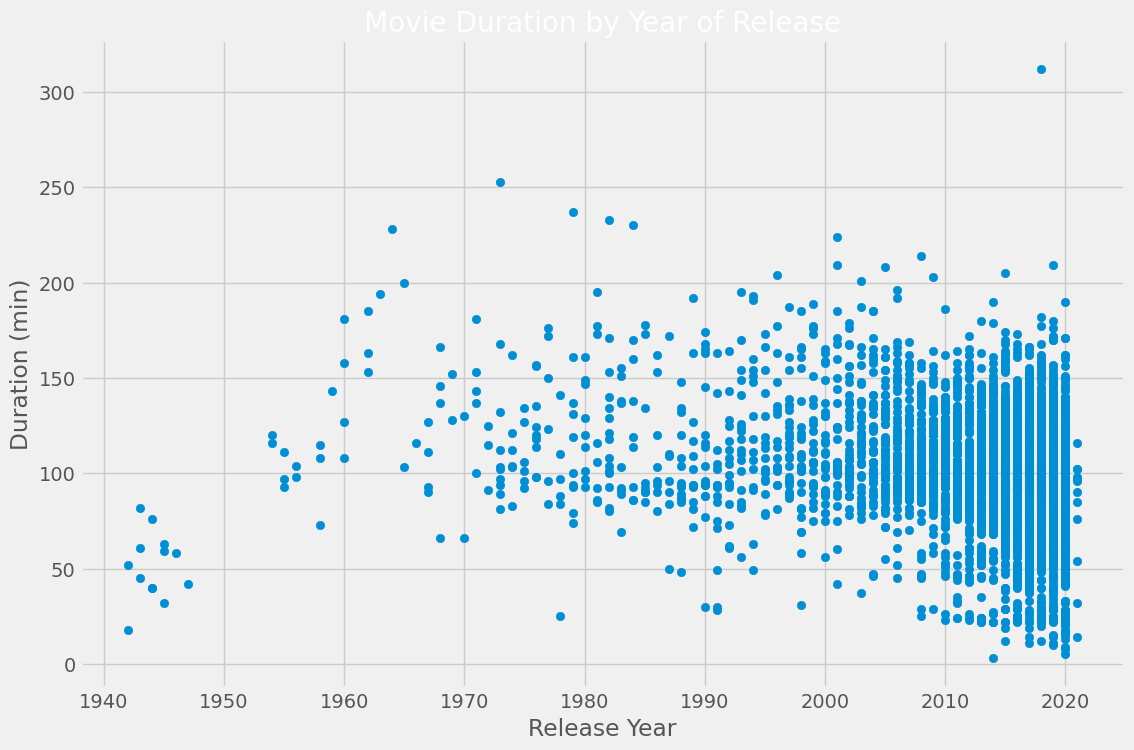

In [118]:
## Visualize the duration distribution with a scatterplot
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies[["release_year"]], netflix_movies[["duration"]])
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")

# Create a title
plt.title("Movie Duration by Year of Release")

plt.savefig("movie_duration_by_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [96]:
## Plot w/ color to make the distribution among genres stand out:
# Make a list of colors based on genre
colors = []
# Iterate over rows of netflix_movies_col_subset
for key, value in netflix_movies.iterrows():
    if value["genre"] == "Children":
        colors.append("purple")
    elif value["genre"] == "Documentaries":
        colors.append("orange")
    elif value["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("blue")

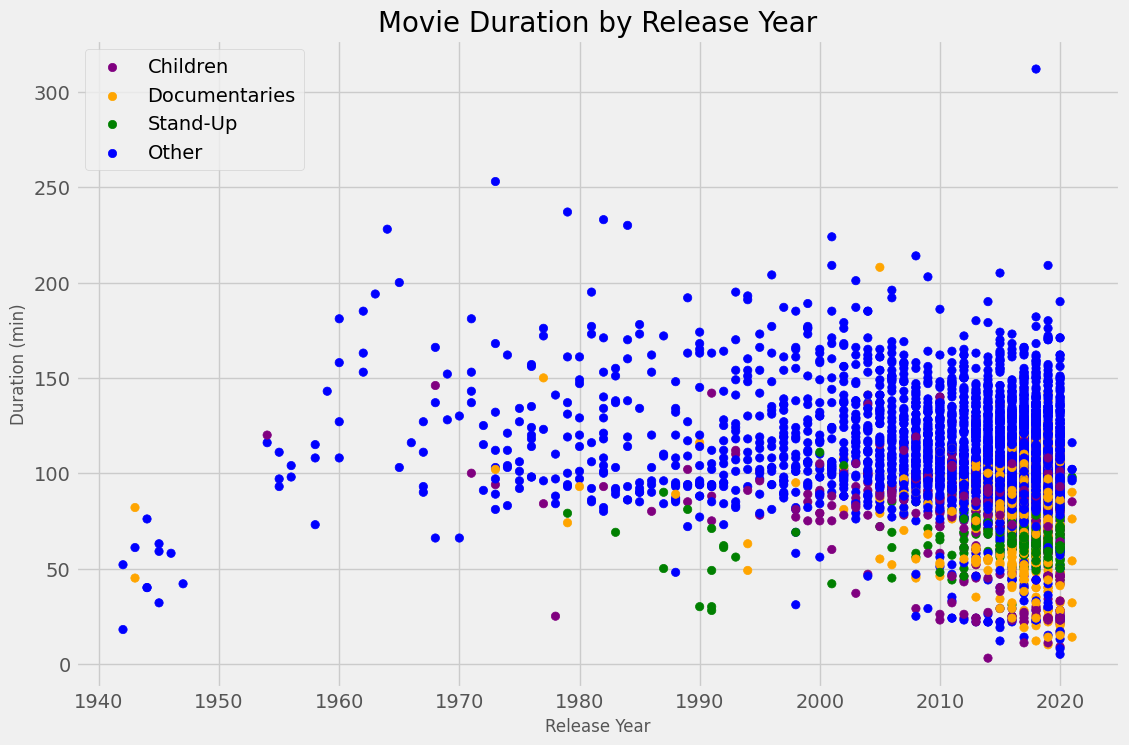

In [132]:
# Create the scatterplot  with color to show distribution:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies[["release_year"]], netflix_movies[["duration"]], c=colors)

# Create a custom legend
legend_labels = ["Children", "Documentaries", "Stand-Up", "Other"]
legend_colors = ["purple", "orange", "green", "blue"]
for label, color in zip(legend_labels, legend_colors):
    plt.scatter([], [], c=color, label=label)
plt.legend(loc="upper right")
legend = plt.legend(loc="upper left")
for text in legend.get_texts():
    text.set_color("black")

# Create a title and label the axes
plt.title("Movie Duration by Release Year", color="black", fontsize=20)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Duration (min)", fontsize=12)
plt.savefig("movie_duration_by_year_colored.png", dpi=300, bbox_inches="tight")
plt.show()

# Duration overall seems to have mostly gone up over time just viewing the scatterplot.  Interesting to note each genre is hovering around the same duration over time.  There is a pretty varied distribution amongst documentaries.

## What was the most frequent movie duration in the 1990s? in the 2000s

In [ ]:
#Create mask and subset for movies released in 1990
movies90smfd = netflix_movies[netflix_movies["release_year"] == 1990]
most_frequent_duration_1990 = movies90smfd["duration"].mode()[0]
print(f"The most frequent movie duration in 1990 is: {most_frequent_duration_1990} minutes.")

#create mask and subset for movies released in the 2000s
movies00smfd = netflix_movies[(netflix_movies["release_year"] == 2000) |(netflix_movies["release_year"] == (2010) ) | (netflix_movies["release_year"] == (2020))]
most_frequent_duration_2000s = movies00smfd["duration"].mode()[0]

print(f"The most frequent movie duration in 2000s is: {most_frequent_duration_2000s} minutes.")


The most frequent movie duration in 1990 is: 88 minutes.
The most frequent movie duration in 2000s is: 93 minutes.


# Movies appear to be getting longer, not shorter as years pass! The friend's hypothesis is incorrect.  Further analysis can be done on different genres to explore further.